# 1. Empirisches Projekt
---
### **Übung zur Erstellung einer Mutiplen Linearen Regression**
Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!


> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.
>
> Gerne bitte ich auch eine Sprechstunde neben den Vorlesungen wo wir uns einmal wöchentlich treffen und Ihr mir direkt Fragen stellt könnte.


Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

# Google Colab:
---
##### 1. [Python Programmierung mit Google Colab link](https://colab.research.google.com/drive/1_LOqSLE3ogQIeh5_ho03JoLbuJAGTnwF)

<img src="Pictures_for_Explanation/1_Google_Colab_Starten.png" alt="Bildbeschreibung" width="600"/>



##### 2. Um ein Skript zu öffnen Navigiert auf Datei was oben Rechts vorzufinden ist und klickt "Notebook öffnen"

<img src="Pictures_for_Explanation/2_Datei_Optionen_öffnen.png" alt="Bildbeschreibung" width="600"/>

##### 3. Danach geht ihr  auf Github und fügt folgenden Link hinzu https://github.com/RiccardoDAndrea/Python-Crashkurs

<img src="Pictures_for_Explanation/3_Zuletzt_Geöffnet.png" alt="Bildbeschreibung" width="600"/>

##### 4. Nachdem Laden werdet ihr mehere Datein wie Skripte vorfinden.
<img src="Pictures_for_Explanation/4_Github_URL_eingeben.png" alt="Bildbeschreibung" width="600"/>

##### 5. Für die Mutiple Lineare Regression wählt ihr Python_regression.ipynb und somit habt ihr erfolgreich das Skript zur bearbeitung eingeladen
<img src="Pictures_for_Explanation/5_Python_MLR.png" alt="Bildbeschreibung" width="600"/>


Aufgabe 1
---

1. Importiert mit den richtigen abkürzung folgenden Packes:
- pandas
- matplotlib
- seaborn
- numpy


Ihr werdet wahrscheinlich eine kleine internet recherse betreiben müssen oder die anderen Skript euch angucken

In [1]:
# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# numpy
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols 
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

Aufgabe 2. Daten einlesen
--- 
Lese folgenden Link mit `Pandas` ein und speicher den Datensatz in der Variable `df`:

- Link: https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/auto-mpg.csv

In [2]:
df = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/auto-mpg.csv")


df.rename(columns={"model-year":"model_year"}, inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


- **mpg:** Miles per Gallon (Meilen pro Gallone). Dies ist ein Maß für den Kraftstoffverbrauch eines Autos.

- **cylinders:** Anzahl der Zylinder im Motor.

- **displacement:** Hubraum des Motors. Der Hubraum ist ein Maß für das Arbeitsvolumen des Motors.

- **horsepower:** Leistung des Motors in Pferdestärken. 

- **weight:** Gewicht des Autos. 

- **acceleration:** Beschleunigung des Autos. Die Beschleunigung gibt an, wie schnell ein Auto von 0 auf eine bestimmte Geschwindigkeit beschleunigt.

- **model-year:** Baujahr des Autos.

Aufgabe 3.
---

Gibt euch eine Statischte zusammenfassung der Daten wieder:

count / mean / std / min / 25% / 50% / 75% / max

In [3]:
# Statischtische zusammenfassung:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Aufgabe 4. 
---

Erstellt ein Code wo ihr für jede Spalte die NaN values betrachtet könnt

Hierbei empfehle ich eine Internet recherse oder ihr schaut in die anderen Skripte rein

In [4]:
# Überprüfe die NaN values:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model_year      0
dtype: int64

Aufgabe 5.
---


In [5]:
df.query('horsepower.isnull()')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74


Im folgenden Code seht ihr die Zeilen wo NaN Werte stehen.

Entscheidet nun wie ihr am *SINNVOLLSTEN* eure Daten ersetzten wollt.
*Seit bereit eure entscheidung zu begrüden.*

In [6]:
# Ersetzte die NaN values
df.dropna(inplace=True)

Da wir bereits *Visualisierungen* besprochen haben werden wir diesen Teil abkürzen, indem wir ein `Pairplot` erstellen um ein groben überblick der Daten zu erhalten.

Die Dokumentation für die Funktion `pairplot` findet ihr [hier](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

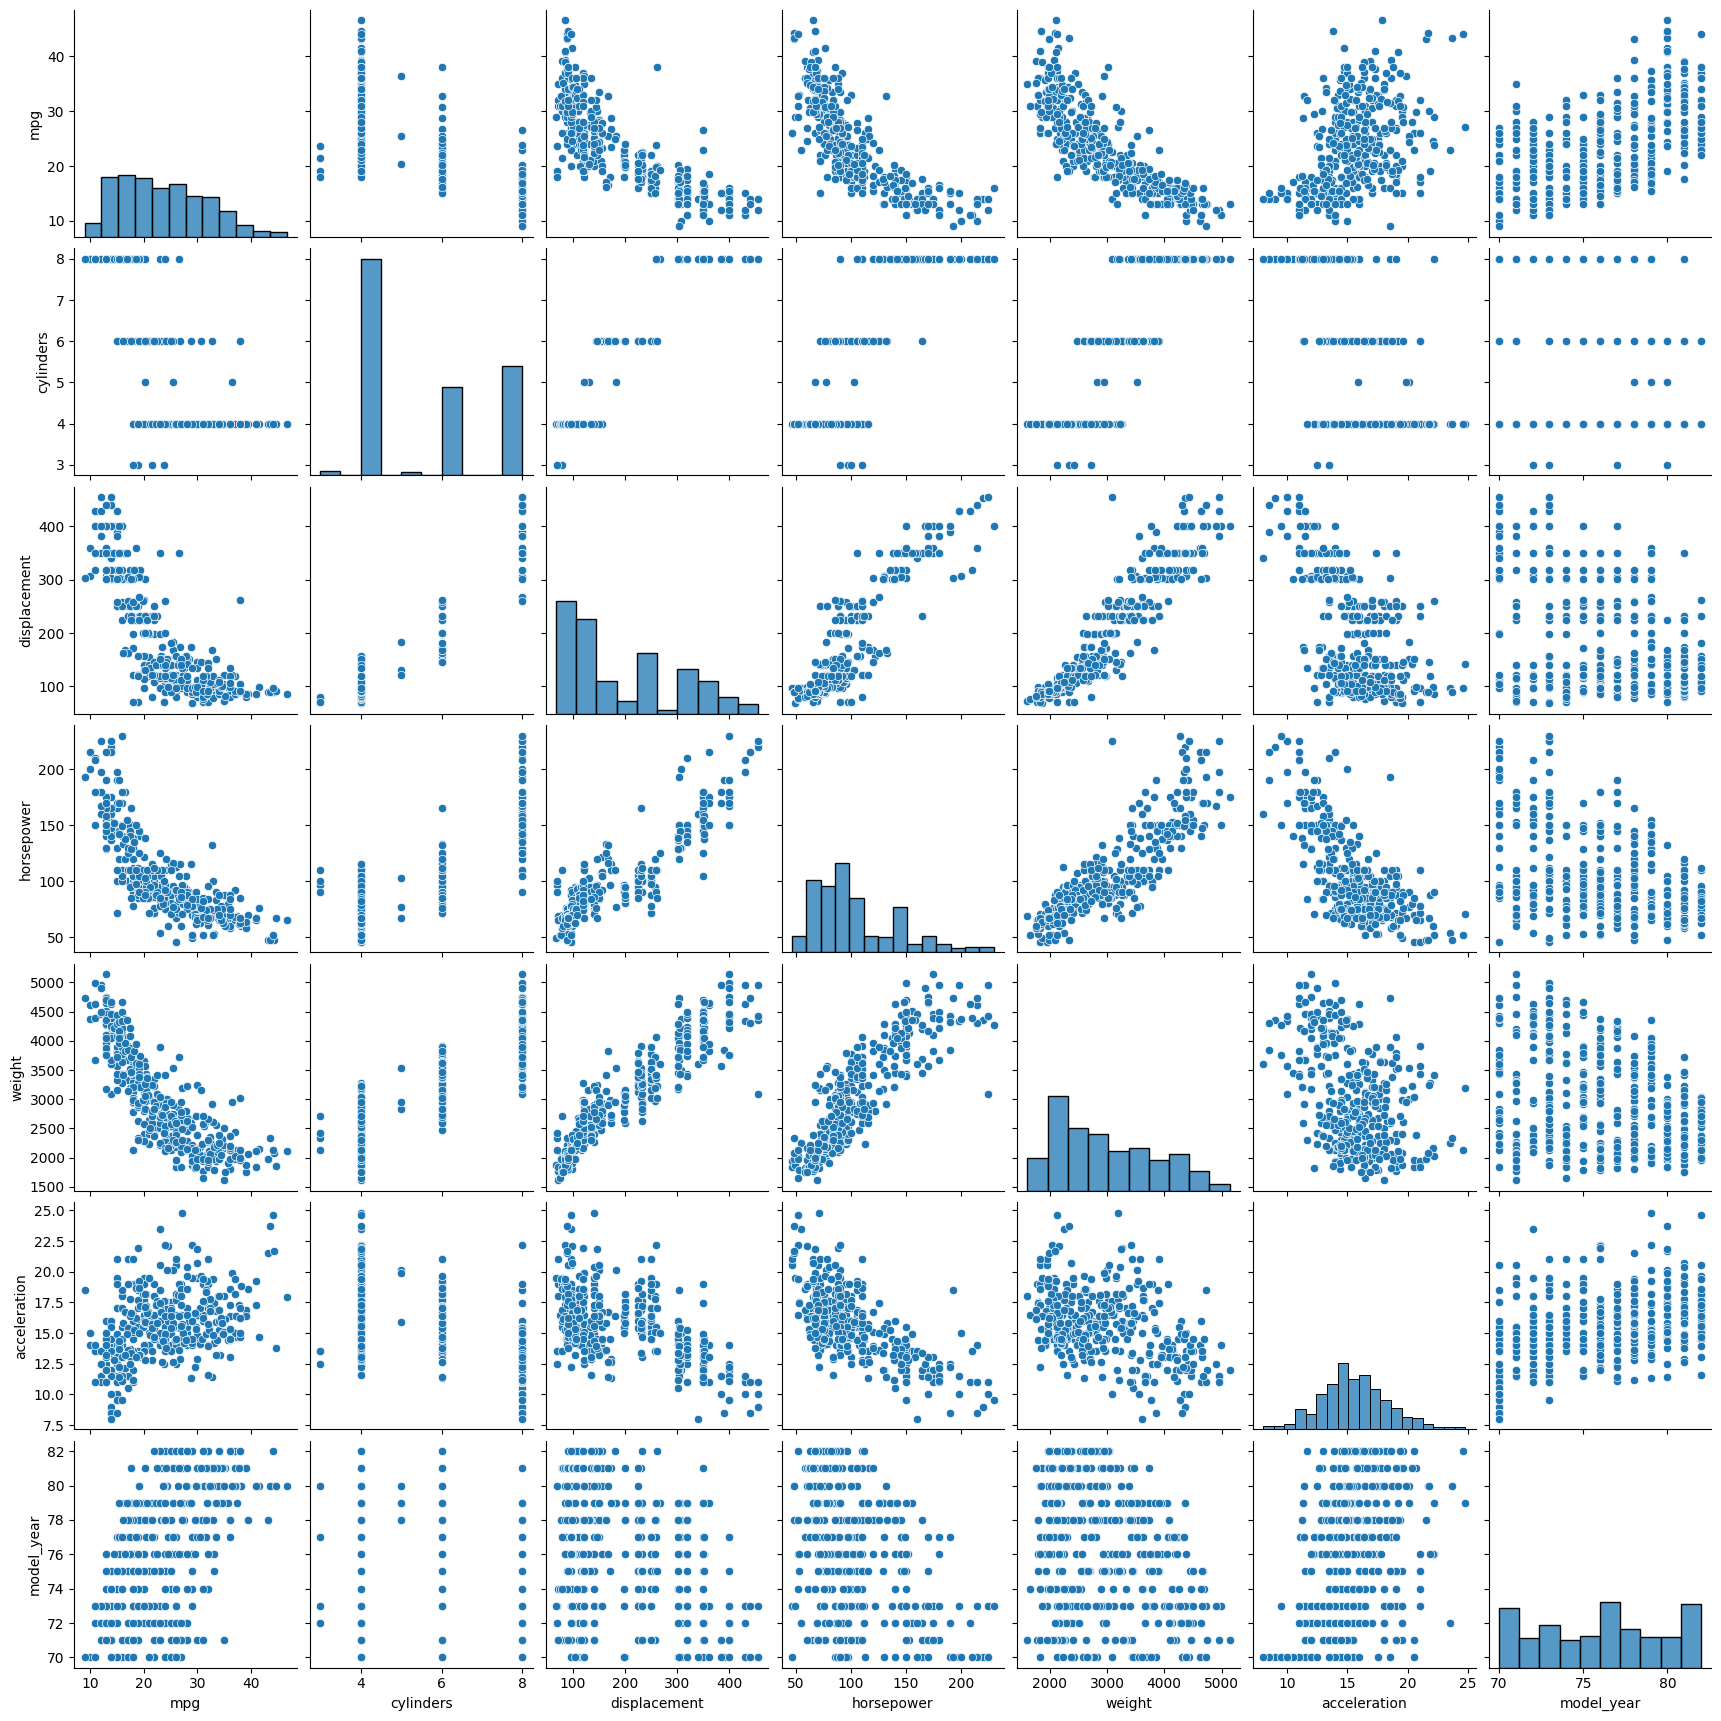

In [7]:
sns.pairplot(df)
plt.show()

Aufgabe 7.
---

7.1 Erstellt ein Korrelations Matrix

7.2 Visualsiert bitte die Korrelation Matrix mit der Funktion `heatmap` aus seabron.

7.3 Speichert nur die Visualsierte Korrelations Matrix in der Variable `Corr_Vis =` 


Als nützliche Hilfestellung könnt ihr folgende Internetseite nutzen: 

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e





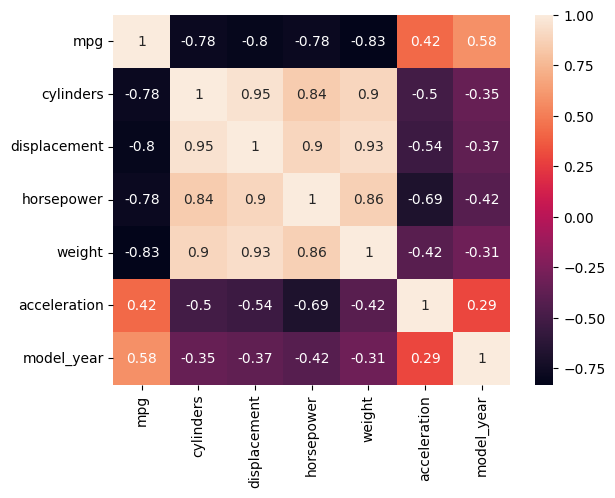

In [8]:
# Aufgabe 7.1

df.corr()


# Aufgabe 7.2 und 7.3
Corr_Vis = sns.heatmap(df.corr(), annot=True)
plt.show()


## Mutiple Lineare Regression:
---

Die folgende Regression werden wir aufbauen:

-> *mpg = cylinders + displacement + horsepower + weight + acceleration + model-year*

Aufgabe 7.
---

Erstelle zwei Variabeln
1. Die erste Variable `(X)` soll die abhängigen Spalten beinhalten
2. Die zweite Variable `(y)` soll die unabhängige Variable enthalten

*Wie Ihr dies erreicht ist euch überlassen, Ihr könnte gerne das Internet zu hilfe nutzen.*


In [9]:
X = df.drop(columns=["mpg"])
y = df["mpg"]

Wir werden für die Mutiple aber auch Simple Lineare Regression das Package Statsmodels nutzen
Die Dokumentation findet ihr hier: https://www.statsmodels.org/stable/regression.html

In `Statsmodels` muss bevor die Regression durchgeführt wird ein Konstante hinzugefügt werden. 

Folgender Code führt dies aus.

In [10]:
X = sm.add_constant(X)
X.head()

,const,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.0,8,307.0,130.0,3504,12.0,70
1,1.0,8,350.0,165.0,3693,11.5,70
2,1.0,8,318.0,150.0,3436,11.0,70
3,1.0,8,304.0,150.0,3433,12.0,70
4,1.0,8,302.0,140.0,3449,10.5,70


#### Um eine Regression aufzubauen haben wir zwei möglichkeiten:
Die erste Möglichkeit ist durch nutzung der beiden Variabelen X und y die weiter oben definiert haben.

### 1. Möglichkeit

In [11]:
model_stats = sm.OLS(y, X)
model_stats = model_stats.fit()
print(model_stats)

### 2. Möglichkeit die mehr an R erinnert
---

In [12]:
model_R = ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year",
                   data=df).fit()

print(model_R.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     274.2
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          2.26e-136
Time:                        12:46:46   Log-Likelihood:                -1049.0
No. Observations:                 396   AIC:                             2112.
Df Residuals:                     389   BIC:                             2140.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.5830      4.760     -3.064   

### ngepasst Model mit Metriken die Signifikant und das Model verbessern

In [13]:
model_R_adj = ols("mpg ~ weight + model_year",
                   data=df).fit()
X = df[["weight","model_year"]]
X = sm.add_constant(X)
print(model_R_adj.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     826.6
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.57e-141
Time:                        12:46:46   Log-Likelihood:                -1049.9
No. Observations:                 396   AIC:                             2106.
Df Residuals:                     393   BIC:                             2118.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.0322      3.998     -3.510      0.0

### 8. Evaluierung des Models:
---
#### *8.1 Welche Metriken sind für euch Relevant und was sagen Sie aus ?*
*Hier habt ihr Platz um kurz und prägnet die wichtigsten Metriken auszuwerten und eure Gedanken aufzuschreiben*

Metriken:



#### *8.2 Beantwortet bitte folgenden Fragen:*

- *was stellt der Intercept dar?*
- *was sagen die Slopes aus ?*
- *und wie beeinflusst das die Ziel Variable "mpg"*

### Durch die Funktion `model_R.params` können wir uns alle Koeffizienten sowie den Intercept in einer neuen Variable abspeichern.

In [14]:
print(model_R_adj.params)
print("Anzahl an Werte zu extrahieren: ", len(model_R_adj.params))

Intercept    -14.032156
weight        -0.006670
model_year     0.754709
dtype: float64
Anzahl an Werte zu extrahieren:  3


Um die Koeffizienten zu extrahieren nutzen wir folgenden Code:

In [15]:
Intercept = model_R_adj.params[0]
weight_slope = model_R_adj.params[1]
model_year_slope = model_R_adj.params[2]
#acceleration_slope = model_R_adj.params[3]

In [16]:
# Regressionsformel als String formatieren
formula = f'mpg = {Intercept:.3f} + {weight_slope:.3f} * weight + {model_year_slope:.3f} * model_year'

In [17]:
print(X.iloc[0][2])
X.head(1)

70.0


,const,weight,model_year
0,1.0,3504,70


In [18]:
X.iloc[0][0]

np.float64(1.0)

In [19]:
formula_calc = Intercept + weight_slope * X.iloc[0][1] + model_year_slope * X.iloc[0][2] 
print("Die erste Vorhersage ist:", formula_calc.round(3))

Die erste Vorhersage ist: 15.426


Vohersagen treffen
---

Die vorhersage wird getroffen durch die Zelle davor aufgestellen Berechnung.
*mpg = -14.583 + -0.249 * cylinders + 0.007 * displacement + 0.001 * horsepower+ -0.007 * weight + 0.088 * acceleration + 0.754 * model_year*

Das bedeuet


In [20]:
prediction = model_R_adj.predict(X)

# Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]
prediction.round(3)

0      15.426
1      14.166
2      15.880
3      15.900
4      15.793
        ...  
393    29.245
394    33.647
395    32.547
396    30.346
397    29.712
Length: 396, dtype: float64

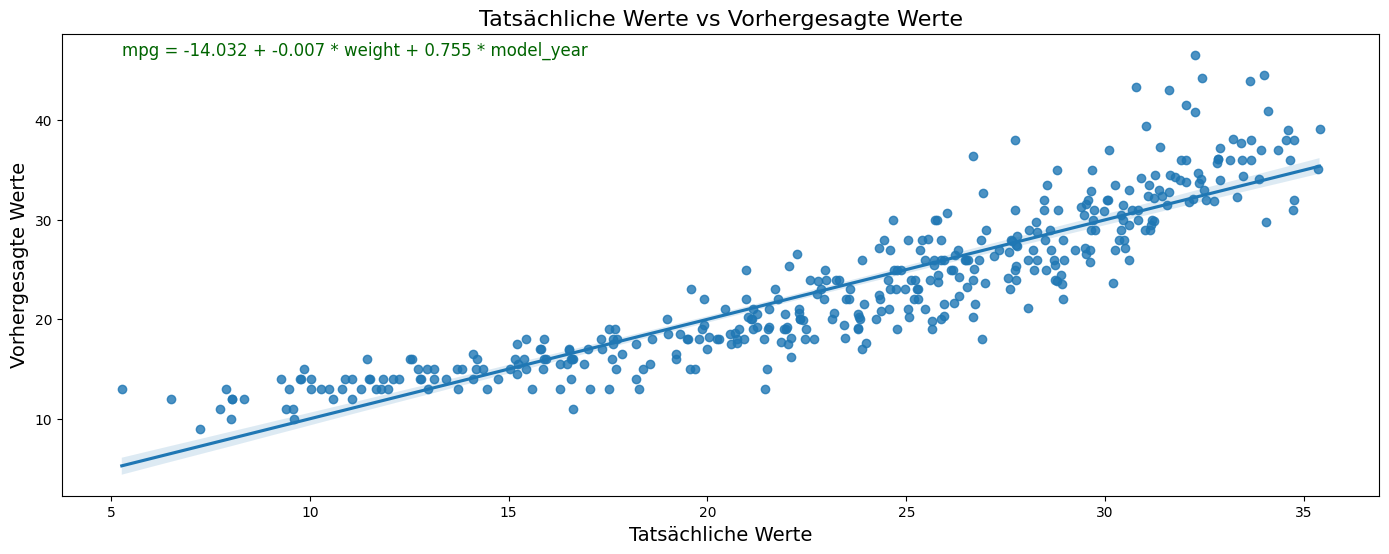

In [21]:
# Scatterplot erstellen 
plt.figure(figsize=(17, 6))
sns.regplot(x=prediction, y=y)  # s=80 macht die Punkte größer

# Die Regressionsformel in die Grafik einfügen
plt.text(x=min(prediction), y=max(y), s=formula, fontsize=12, color='darkgreen', ha='left')

# Plot-Titel und Achsenbeschriftungen
plt.title("Tatsächliche Werte vs Vorhergesagte Werte", fontsize=16)
plt.xlabel("Tatsächliche Werte", fontsize=14)
plt.ylabel("Vorhergesagte Werte", fontsize=14)

# Plot anzeigen und speichern
plt.savefig("MLR_Output/Title_Actual_vs_Predicted_with_formula.png", dpi=100)
plt.show()


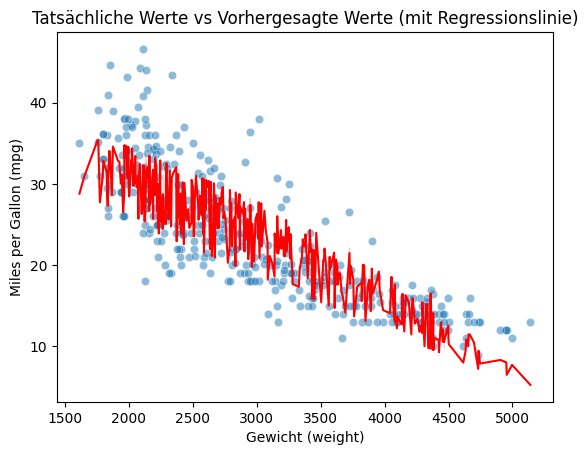

In [22]:
sns.scatterplot(x=X["weight"], y=y, alpha=0.5)

# Regressionslinie hinzufügen
sns.lineplot(x=df["weight"], y=prediction, color='red')

plt.title("Tatsächliche Werte vs Vorhergesagte Werte (mit Regressionslinie)")
plt.xlabel("Gewicht (weight)")
plt.ylabel("Miles per Gallon (mpg)")

plt.savefig("MLR_Output/Tatsächliche Werte vs Vorhergesagte Werte.png")
plt.show()

### Residuale berechnen
---

Resiudale sind die tatsächlichen Werte abzgl. die vorhersage Werte

### Aufgabe 9. 

Berechnet die Residuale eingenständig:
Nutz dafür Rechen Operatoren speichert die Ergebnis in der Variabel `resi =`


In [23]:
# Resiudale eingentständig berechnen

resi = y - prediction

resi

0       2.573745
1       0.834350
2       2.120194
3       0.100185
4       1.206902
         ...    
393    -2.245047
394    10.352841
395    -0.546631
396    -2.345575
397     1.288063
Length: 396, dtype: float64

In [24]:
residuals = model_R_adj.resid
residuals

0       2.573745
1       0.834350
2       2.120194
3       0.100185
4       1.206902
         ...    
393    -2.245047
394    10.352841
395    -0.546631
396    -2.345575
397     1.288063
Length: 396, dtype: float64

### Aufgabe 10.

Visuallisiere die Residuale:

1. Erstelle ein Scatterplot wo du die Vorhersage werte und die Residuale darstellt:

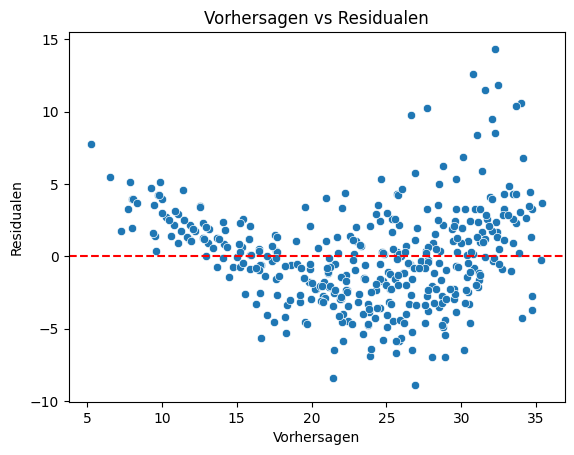

In [25]:
# Scatterplot der Vorhersagen gegen Residualen
sns.scatterplot(y=residuals, x=prediction)

plt.title("Vorhersagen vs Residualen")
plt.axhline(y = 0, color = 'r', linestyle = '--') # fügt eine rote horziontale Linie hinzu
plt.xlabel("Vorhersagen")
plt.ylabel("Residualen")


plt.savefig("MLR_Output/Title_Residuals_vs_Predictions.png")
plt.show()

### Erstelle ein Histogramm mit den Resiudalen

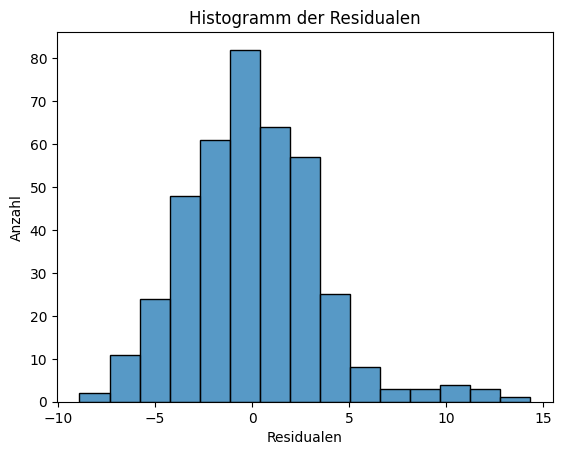

In [26]:
sns.histplot(x=residuals, bins=15)
plt.title("Histogramm der Residualen")
plt.xlabel("Residualen")
plt.ylabel("Anzahl")


plt.savefig("MLR_Output/Title_")
plt.show()

### Aufgabe 11.
Interpretieren den Histogramm und nimm stellung zu der Verteilung der Resiudale ? 


Stellungsnahme: Hier rein schreiben







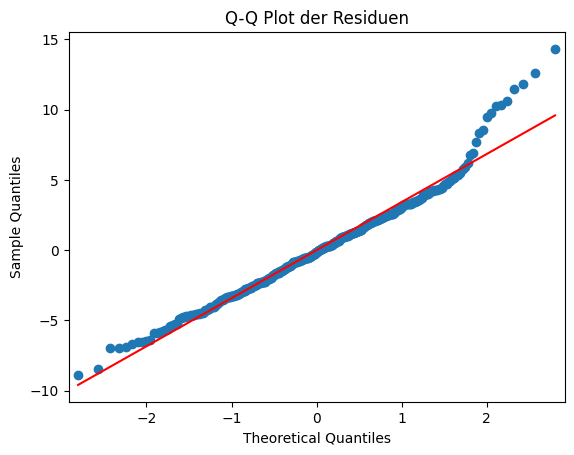

In [27]:
fig = sm.qqplot(residuals, line='r')  # 'r' fügt die Referenzlinie hinzu
plt.title("Q-Q Plot der Residuen")
plt.savefig("MLR_Output/Title_")
plt.show()

## Multikollinearität
---


*Der Variance Inflation Factor (VIF)* ist ein Maß dafür, wie stark die Varianz einer geschätzten Regressionskoeffizienten erhöht wird, wenn mehrere unabhängige Variablen in einem Regressionsmodell verwendet werden. Ein hoher VIF-Wert deutet darauf hin, dass die betreffende Variable stark mit anderen unabhängigen Variablen korreliert ist, was auf ein Problem der Multikollinearität hinweisen kann.


VIF-Werte:
- VIF < 5: Geringe Multikollinearität. Es besteht kein ernsthaftes Problem.
- 5 ≤ VIF < 10: Moderate Multikollinearität, die möglicherweise problematisch ist.
- VIF ≥ 10: Hohe Multikollinearität, die sehr problematisch ist und die Genauigkeit der Schätzung beeinträchtigen kann.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF Berechnung nur für die Variablen in X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Berechne den VIF für jede unabhängige Variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,const,534.236110
1,weight,1.107669
2,model_year,1.107669


Welche Code können wir nutzen um den VIF zu untermauern

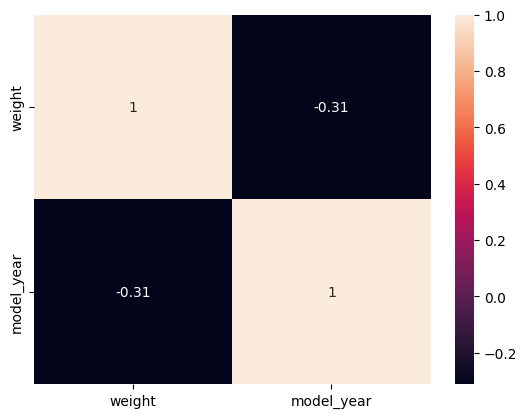

In [29]:
#### Hier eure Vermutgen reinschreiben und Schreibe die passende bereits definierte Variable dafür 

Corr_Vis = sns.heatmap(X[["weight","model_year"]].corr(), annot=True)
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

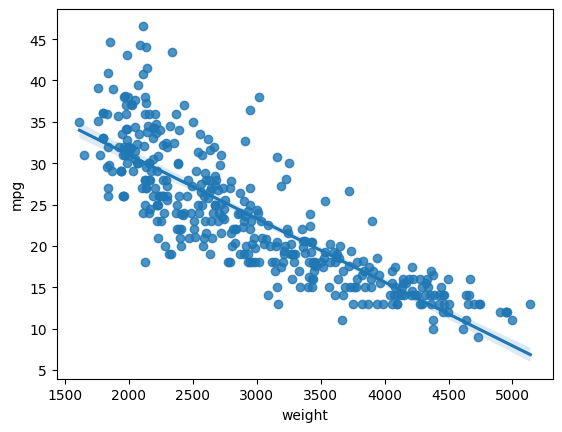

In [30]:
sns.regplot(x=X["weight"], y=y)

### Analysis of variance (Anova)
---

Die ANOVA (Analysis of Variance) ist eine statistische Methode, die verwendet wird, um zu testen, ob es signifikante Unterschiede zwischen den Mittelwerten von drei oder mehr Gruppen gibt. Im Kontext einer linearen Regression (wie mit der Funktion anova_lm() von statsmodels) hilft sie uns zu verstehen, wie gut das Modell die Varianz in der abhängigen Variable erklärt.

In [31]:
from statsmodels.stats.anova import anova_lm

# ANOVA-Test durchführen
anova_results = anova_lm(model_R_adj) 
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
weight,1.0,16811.561977,16811.561977,1418.906308,1.704976e-132
model_year,1.0,2776.117534,2776.117534,234.306050,8.126612e-42
Residual,393.0,4656.363721,11.848254,NaN,NaN


In [32]:
DF = anova_results["df"][0:2].sum()
SS = anova_results["sum_sq"][0:2].sum().round(4)
MS = anova_results["mean_sq"][0:2].sum().round(4) / DF       # DF = 2
F_statistic = anova_results["F"][0:2].sum().round(4) / DF    # DF = 2
p_value = anova_results["PR(>F)"][0:2].sum().round(4)

# Erstellen eines DataFrames
results_df = pd.DataFrame({
    "DF": [DF],
    "SS": [SS],
    "MS": [MS],
    "F_statistic": [F_statistic],
    "p_value": [p_value]},
    index=["Regression"])

results_df

,DF,SS,MS,F_statistic,p_value
Regression,2.0,19587.6795,9793.83975,826.6062,0.0


In [33]:
# Residuals behalten
residuals_anova = anova_results.iloc[2:3]
residuals_anova

,df,sum_sq,mean_sq,F,PR(>F)
Residual,393.0,4656.363721,11.848254,NaN,NaN


In [34]:
# Erstellen eines DataFrames
df_resi = float(residuals_anova["df"][0:1].values)
sum_sq_resi = float(residuals_anova["sum_sq"][0:1].values)
mean_sq_resi = float(residuals_anova["mean_sq"][0:1].values)

# Erstellen eines DataFrames
residuals_anova_df = pd.DataFrame({
    "DF": [df_resi],
    "SS": [sum_sq_resi],
    "MS": [mean_sq_resi]},
    index=["Residuals"])
df_anova = pd.concat([results_df,residuals_anova_df] )
df_anova

,DF,SS,MS,F_statistic,p_value
Regression,2.0,19587.679500,9793.839750,826.6062,0.0
Residuals,393.0,4656.363721,11.848254,NaN,NaN


In [35]:
Total_Regression_DF = df_anova["DF"][0:2].sum()
Total_residuals_SS = df_anova["SS"][0:2].sum()

total = pd.DataFrame({
    "DF": [Total_Regression_DF],
    "SS": [Total_residuals_SS],
}, index=["Total"])
total


,DF,SS
Total,395.0,24244.043221


In [36]:
df_anova = pd.concat([df_anova,total])
df_anova

,DF,SS,MS,F_statistic,p_value
Regression,2.0,19587.679500,9793.839750,826.6062,0.0
Residuals,393.0,4656.363721,11.848254,NaN,NaN
Total,395.0,24244.043221,NaN,NaN,NaN


- *df:* Wie viele Freiheitsgrade (unabhängige Informationen) für jede Variable vorhanden sind.

- *sum_sq:* Die Gesamtmenge der durch die Variable erklärten Variabilität (höher ist besser).

- *mean_sq:* Die pro Freiheitsgrad erklärte Variabilität (höher ist besser).

- *F:* Gibt die Signifikanz des Einflusses der Variablen an (höher bedeutet ein signifikanterer Einfluss).

- *PR(>F):* Der p-Wert, der die statistische Signifikanz testet (kleiner p-Wert bedeutet signifikanter Einfluss).


Homoskedastizität oder Heteroskedastizität ?
---


<img src="Pictures_for_Explanation/heteroskedastizität.jpg" alt="heteroskedastizität" width="600"/>


Durchführung eines Breusch-Pagan-Test:
---

Der Breusch-Pagan-Test prüft die Nullhypothese von Homoskedastizität. Ein geringer p-Wert verwirft diese und nimmt die Alternativhypothese von Heteroskedastizität an.


**Nullhypothese (H0):** Die Varianz der Residuen ist konstant (Homoskedastizität).

**Alternativhypothese (H1):** Die Varianz der Residuen ist nicht konstant (Heteroskedastizität), wobei die Varianz möglicherweise eine Funktion der unabhängigen Variablen ist.

Wenn der p-Wert klein ist (typischerweise < 0.05), lehnen wir die Nullhypothese der Homoskedastizität ab und schließen auf das Vorhandensein von Heteroskedastizität
Ein größerer p-Wert (> 0.05) bedeutet, dass wir nicht genügend Beweise haben, um die Nullhypothese der Homoskedastizität abzulehnen

*Unsere Daten Analyse:*
In der Regel wird ein Wert < 10 als Heteroskedastizität angesehen

In unseren fall haben wir Heteroskedastizität!

In [37]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(resid=residuals, exog_het=X)

print("LM-Statistik (Lagrange-Multiplier-Wert)", bp_test[0].round(4))
print("pvalue", bp_test[1].round(4))

LM-Statistik (Lagrange-Multiplier-Wert) 17.8753
pvalue 0.0001


White-Test:
---
Definition: Die LM-Statistik des White-Tests prüft, ob die Varianz der Residuen konstant ist (Homoskedastizität) oder ob sie abhängig von den unabhängigen Variablen variiert (Heteroskedastizität). Dabei berücksichtigt der White-Test zusätzlich auch nicht-lineare Beziehungen und Wechselwirkungen zwischen den unabhängigen Variablen.

Interpretation: 
- Eine höhere LM-Statistik zeigt eine größere Wahrscheinlichkeit an, dass Heteroskedastizität vorliegt.
- P-Value geringer P wert deutet auf Heteroskedastizität


- **Nullhypothese (H0):** Es liegt keine Heteroskedastizität vor (Homoskedastizität).

- **Alternativhypothese (H1):** Es liegt Heteroskedastizität vor, und die Varianz der Residuen könnte nicht nur von den unabhängigen Variablen abhängen, sondern auch von ihren quadrierten Werten und Kreuzprodukten.

-> Generell wird ein LM-Wert von 10 oder mehr als signifikante *Heteroskedastizität* angesehen. In usneren Fall ist der Wert von 89.5357 sehr hoch, was auf deutliche Hinweise für Heteroskedastizität hinweist.


Durchführung eines White test

In [38]:
from statsmodels.stats.diagnostic import het_white

wtest = het_white(resid=residuals, exog = X)
print("lm", wtest[0].round(4), "lm_pvalue", wtest[1].round(4))

lm 24.2386 lm_pvalue 0.0002


**Vergleich mit dem Breusch-Pagan-Test:**
Breusch-Pagan-Test: Testet nur auf lineare Abhängigkeiten zwischen den Residuen und den unabhängigen Variablen.


**White-Test:** Erweitert den Test, indem er auch nicht-lineare Effekte (wie quadratische oder interaktive) zwischen den unabhängigen Variablen prüft. Dadurch ist der White-Test allgemeiner und kann auch komplexere Formen von Heteroskedastizität erkennen.

Infall der *Heteroskedastizität* können wir in der Funktion `.fit()` den parameter mitgeben 

- `cov_type = 'nonrobust', 'fixed scale', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC', 'hac-panel', 'hac-groupsum', 'cluster'` 

um unteranderem gegen Heteroskedastizität die werte anzupassen können wir die Parameter anpassen

In [41]:
model_R_adj_H1 = ols("mpg ~ weight + model_year",
                   data=df).fit(cov_type="HC1")

print(model_R_adj_H1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     746.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.30e-134
Time:                        12:48:21   Log-Likelihood:                -1049.9
No. Observations:                 396   AIC:                             2106.
Df Residuals:                     393   BIC:                             2118.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.0322      3.807     -3.686      0.0